In [23]:
import opensea.database as db
import pandas as pd

In [24]:
bayc_listings = db.read_mongo(collection="boredapeyachtclub_listings", return_df=True)

In [25]:
#drop the duplicates
bayc_listings = bayc_listings.drop_duplicates(subset=['listing_id'])

In [26]:
#sort by time
bayc_listings = bayc_listings.sort_values(by=['listing_id'])

In [27]:
#get the time difference between listings in minutes
bayc_listings['time_diff'] = (bayc_listings['time'] - bayc_listings['time'].shift(1)).dt.total_seconds()/60

In [31]:
#sort my time difference high to low
bayc_listings = bayc_listings.sort_values(by=['time_diff'], ascending=False)

In [41]:
#add a column for month
bayc_listings['month'] = pd.DatetimeIndex(bayc_listings['time']).month
#add column for day
bayc_listings['day'] = pd.DatetimeIndex(bayc_listings['time']).day
#add column for hour
bayc_listings['hour'] = pd.DatetimeIndex(bayc_listings['time']).hour

In [48]:
bayc_listings_jan = bayc_listings[bayc_listings['month'] == 1]

<AxesSubplot:xlabel='day'>

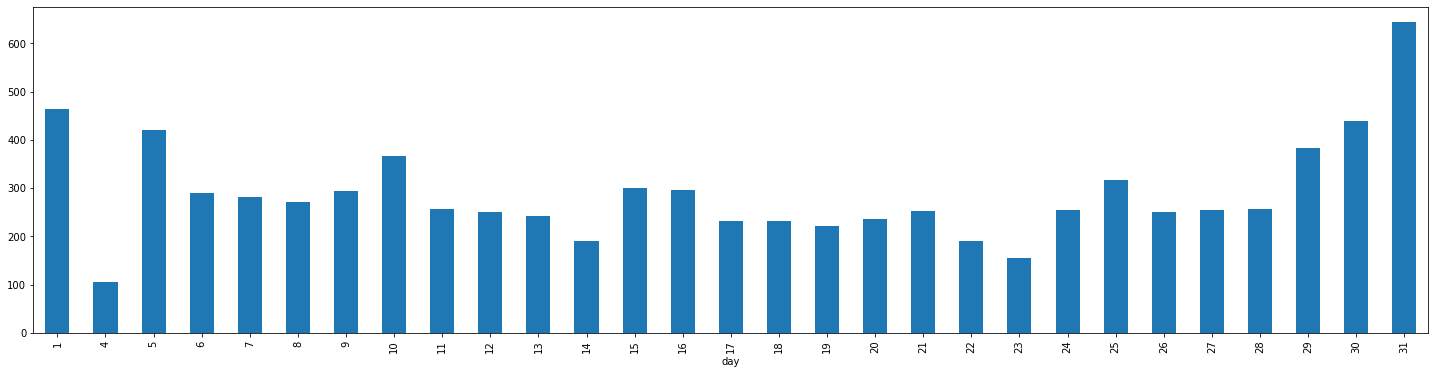

In [52]:
#plot the number of listings per day in January
bayc_listings_jan.groupby(['day']).count()['listing_id'].plot(figsize=(25,6), kind='bar')